In [1]:
import shap
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = load_wine()

In [3]:
X, y = data['data'], data['target']
data['target_names']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [5]:
clf.score(X_test, y_test)

1.0

In [6]:
clf.predict([X_test[0]])

array([0])

In [7]:
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_train, 5))

In [8]:
shap_values = explainer.shap_values(X_test)

100%|██████████| 36/36 [00:01<00:00, 21.35it/s]


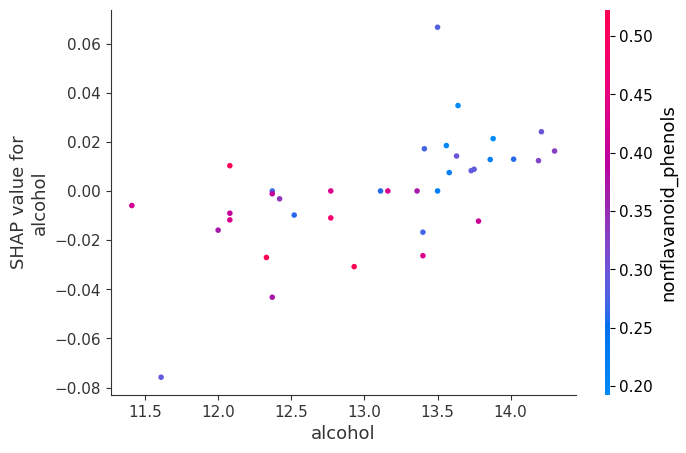

In [9]:
shap.dependence_plot(0, shap_values, X_test, feature_names=data['feature_names']) # Aqui temos o gráfico de dependência para a primeira característica.
# Esse gráfico mostra a relação entre o valor da característica e o valor SHAP, que indica a contribuição dessa característica para a predição do modelo.

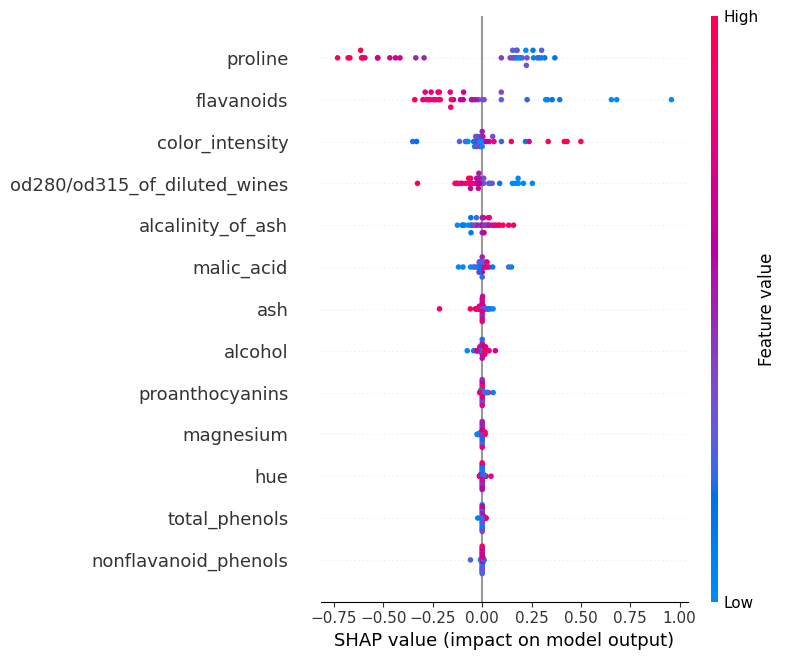

In [10]:
shap.summary_plot(shap_values, X_test, feature_names=data['feature_names'])

In [11]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0], feature_names=data['feature_names'])

In [12]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], X_test[1], feature_names=data['feature_names'])

In [13]:
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

In [14]:
feature_names = data['feature_names']
feature_importance = sorted(zip(feature_names, mean_abs_shap_values), key=lambda x: x[1], reverse=True)

In [15]:
feature_importance

[('proline', np.float64(0.34339345496022583)),
 ('flavanoids', np.float64(0.2378620913965418)),
 ('color_intensity', np.float64(0.10786632642339435)),
 ('od280/od315_of_diluted_wines', np.float64(0.08194043446195509)),
 ('alcalinity_of_ash', np.float64(0.051056353529266824)),
 ('malic_acid', np.float64(0.027401853454084444)),
 ('ash', np.float64(0.021052626535359678)),
 ('alcohol', np.float64(0.01627753772698998)),
 ('proanthocyanins', np.float64(0.007577739052451833)),
 ('magnesium', np.float64(0.0074886677803200526)),
 ('hue', np.float64(0.005976829924813955)),
 ('total_phenols', np.float64(0.005078060546399647)),
 ('nonflavanoid_phenols', np.float64(0.003550407260669997))]

In [16]:
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

proline: 0.3434
flavanoids: 0.2379
color_intensity: 0.1079
od280/od315_of_diluted_wines: 0.0819
alcalinity_of_ash: 0.0511
malic_acid: 0.0274
ash: 0.0211
alcohol: 0.0163
proanthocyanins: 0.0076
magnesium: 0.0075
hue: 0.0060
total_phenols: 0.0051
nonflavanoid_phenols: 0.0036
